In [1]:
import f3dasm
import numpy as np
import copy
import pandas as pd

2022-11-18 13:30:49.338564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 13:30:49.424896: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
seed = 2021
dim = 2
iterations = 1000
bounds = np.tile([-1.0,1.0], (dim, 1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)

function = f3dasm.functions.Ackley(dimensionality=dim, scale_bounds=bounds, seed=seed, noise=0.2)

data = f3dasm.Data(design=design)
optimizer = f3dasm.optimization.Adam(data=data, seed=seed)
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=seed)

(<Figure size 700x700 with 1 Axes>,
 <Axes3DSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$', zlabel='$f(X)$'>)

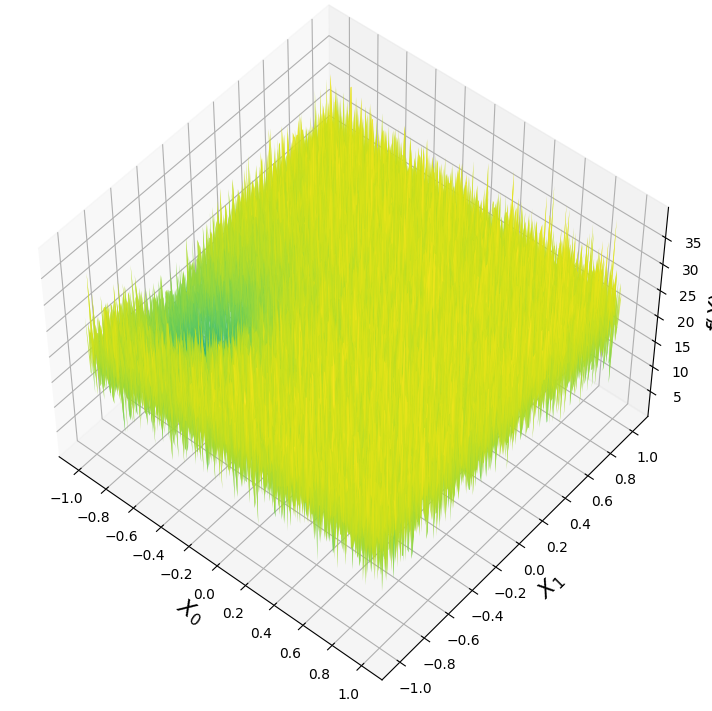

In [3]:
function.plot(px=300,domain=bounds)

In [4]:
samples = sampler.get_samples(30)
samples.add_output(output=function(samples))
samples

In [5]:
optimizer.set_data(copy.copy(samples))
optimizer.iterate(iterations=iterations, function=function)

2022-11-18 13:31:05.832346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Optimizing for 1000 iterations with Adam


In [6]:
optimizer.data

In [7]:
from f3dasm.base.metaoptimizer import MetaOptimizer, EqualParts_Strategy

In [8]:
optimizer_1 = f3dasm.optimization.RandomSearch(data=samples, seed=seed)
optimizer_2 = f3dasm.optimization.Adam(data=samples, seed=seed)
optimizer_3 = f3dasm.optimization.SGD(data=samples, seed=seed)


strategy= EqualParts_Strategy(optimizers=[optimizer_1, optimizer_2, optimizer_3])


metaoptimizer = MetaOptimizer(data=samples, strategy=strategy, seed=seed)

In [9]:
metaoptimizer.iterate(iterations=iterations, function=function)

Optimizing for 333 iterations with RandomSearch
Optimizing for 333 iterations with Adam


In [ ]:
function.plot_data(data=optimizer.extract_data(), domain=bounds)

In [ ]:
function.plot_data(data=metaoptimizer.extract_data(),domain=bounds)

In [ ]:
# pd.set_option('display.max_rows', None)
# metaoptimizer.data.data

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')
ax.plot(metaoptimizer.data.get_output_data())
ax.plot(optimizer.data.get_output_data())

In [ ]:
len(metaoptimizer.data.data), len(optimizer.data.data)

In [ ]:
np.array([[parameter.lower_bound, parameter.upper_bound] for parameter in design.input_space])
    